# Hierarchical Agglomerative Clustering

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [59]:
len(df.columns)

5

In [60]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

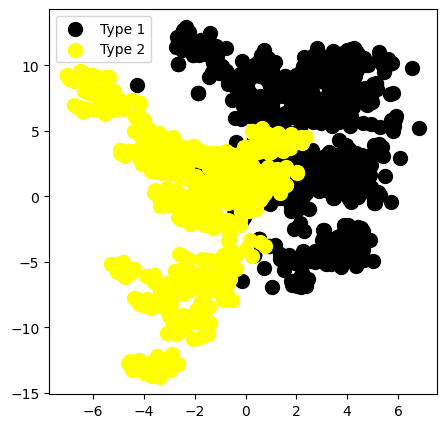

In [61]:
plt.figure(figsize=(5,5))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=100, c='black', label='Type 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=100, c='yellow', label='Type 2')
plt.legend()
plt.show()

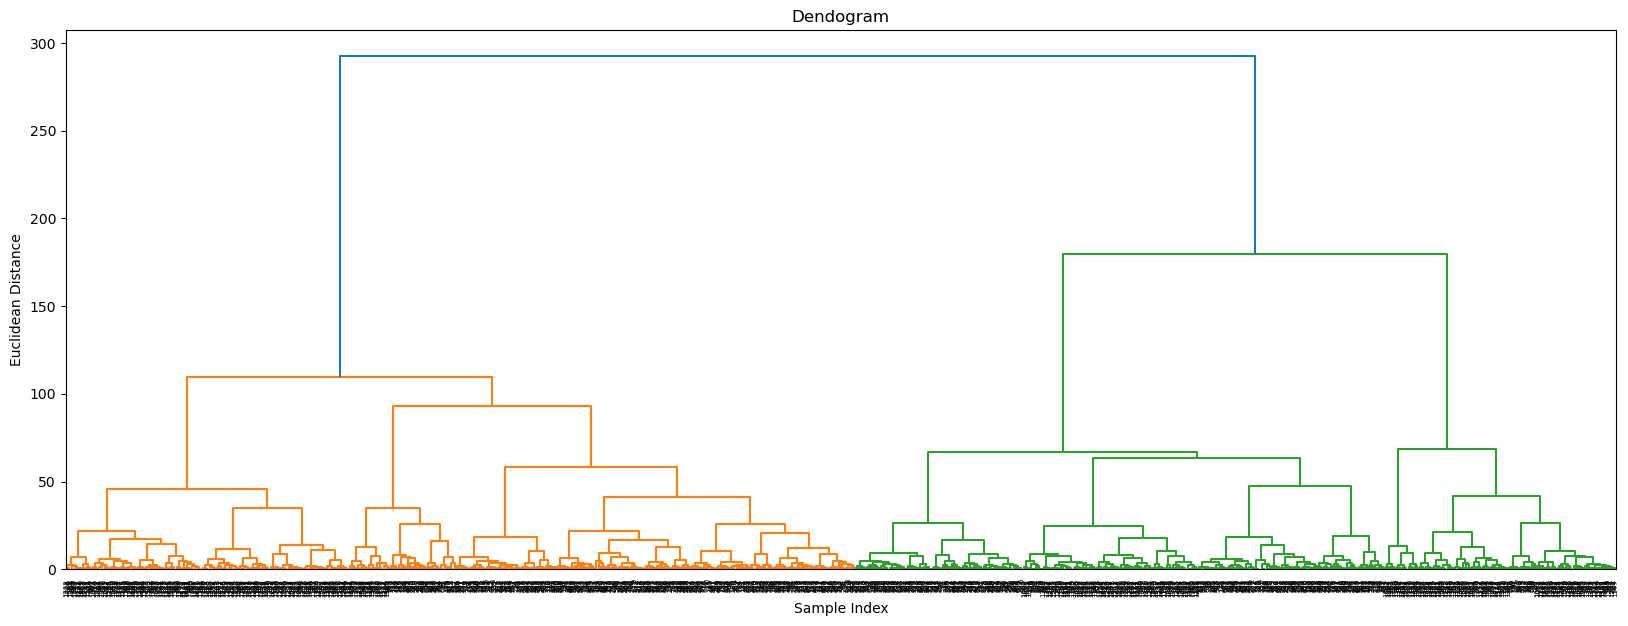

In [63]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendograms")
sc.dendrogram(sc.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit(X)
labels = cluster.labels_
labels

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

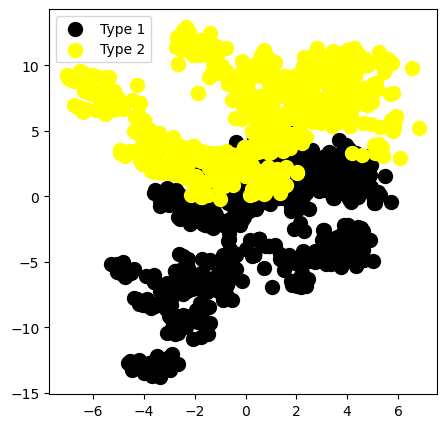

In [65]:
plt.figure(figsize=(5,5))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=100, c='black', label='Type 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=100, c='yellow', label='Type 2')
plt.legend()
plt.show()

### Synthetic Dataset

In [66]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,22],
    [24,10],
    [30,3],
    [85,70],
    [71,80],
    [90,68],
    [70,55],
    [80,19],])

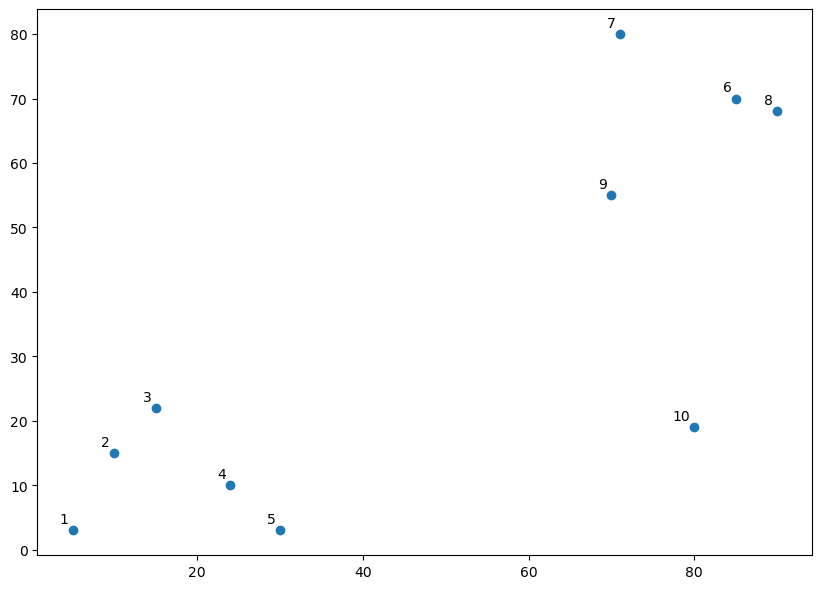

In [67]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

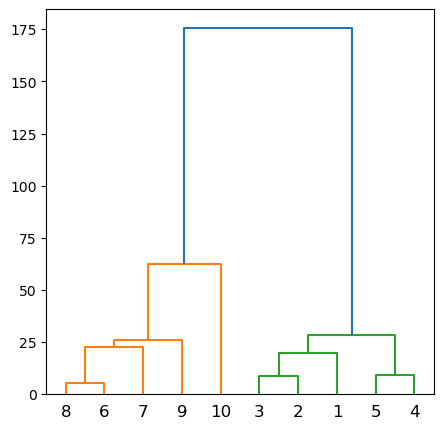

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'ward')

labelList = range(1, 11)

plt.figure(figsize=(5, 5))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# K-means clustering

In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

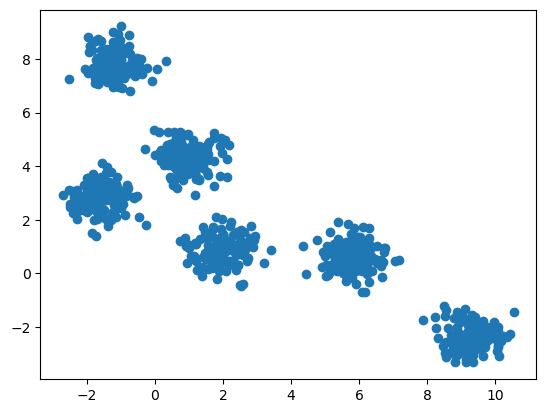

In [70]:
X, y = make_blobs(n_samples=800, centers=6, cluster_std=0.50, random_state=0)
plt.scatter(X[:,0], X[:,1])

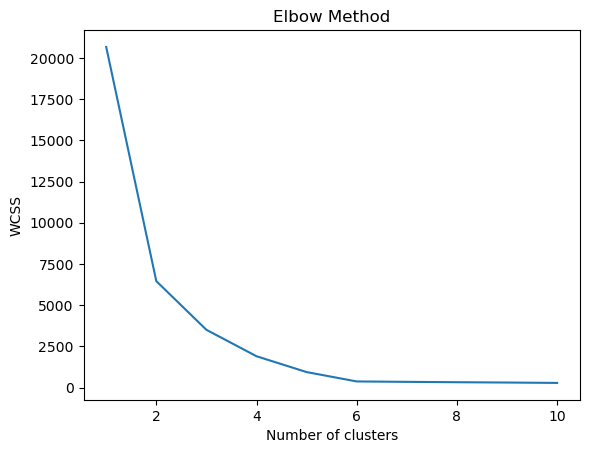

In [71]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

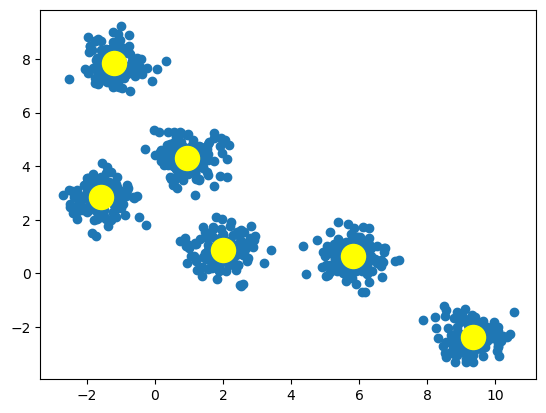

In [72]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')
plt.show()

# Perceptron

In [73]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
X, y = make_classification(n_samples=1000,n_features=10,n_informative=10,n_redundant=0,random_state=1)
model = Perceptron()
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores),std(scores)))
model.fit(X,y)
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
yhat = model.predict([row])
print("Predicted Class :",yhat)

Mean Accuracy: 0.847 (0.052)
Predicted Class : [1]


# Back Propagation 

In [74]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [75]:
data=pd.read_csv('mnist_train.csv')

In [76]:
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [78]:
nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(10,15),random_state=1)

In [79]:
nn.fit(x_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 15),
              random_state=1, solver='sgd')

In [80]:
pred=nn.predict(x_test)

In [81]:
a = y_test.values
count = 0

In [82]:
for i in range(len(pred)):
    if(a[i]==pred[i]):
        count+=1

print(count)
print(len(pred))
print("Accuracy manually :",str(count/len(pred)))

10489
12000
Accuracy manually : 0.8740833333333333


In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred,y_test.values)

diagonal_sum = cm.trace()
sum_of_all_elements = cm.sum()

print("Accuracy of MLPClassifier :",diagonal_sum / sum_of_all_elements)

Accuracy of MLPClassifier : 0.8740833333333333


# Support Vector Machine

In [84]:
def plotSVC(title):
  x_min, x_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx.min(), xx.max())
  plt.title(title)
  plt.show()

In [85]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline
wine = datasets.load_wine()
X = wine.data[:, :2] 
y = wine.target

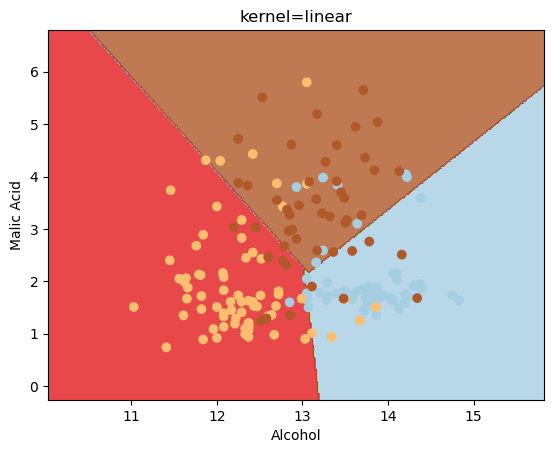

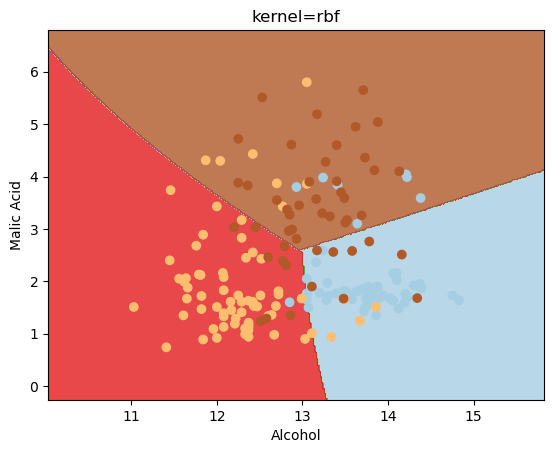

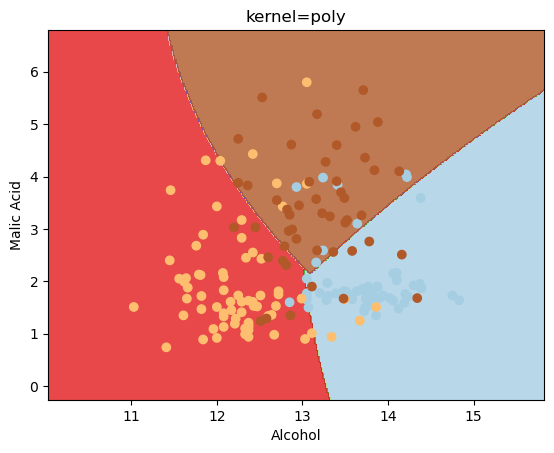

In [86]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
  svc = svm.SVC(kernel=kernel).fit(X, y)
  plotSVC('kernel=' + str(kernel))

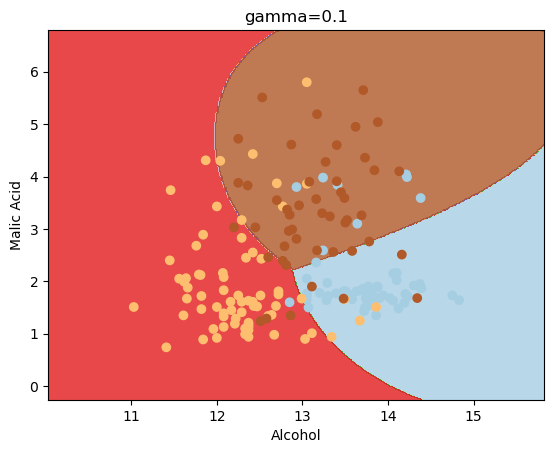

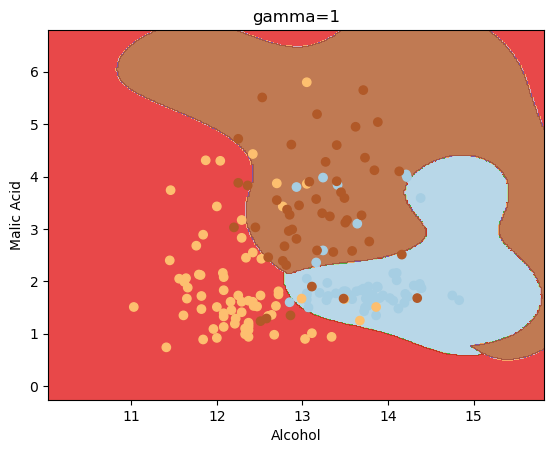

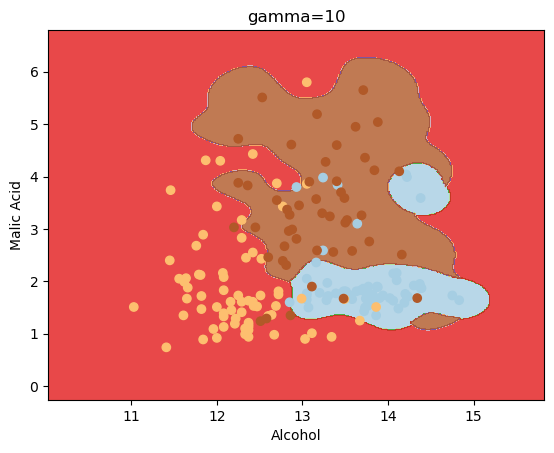

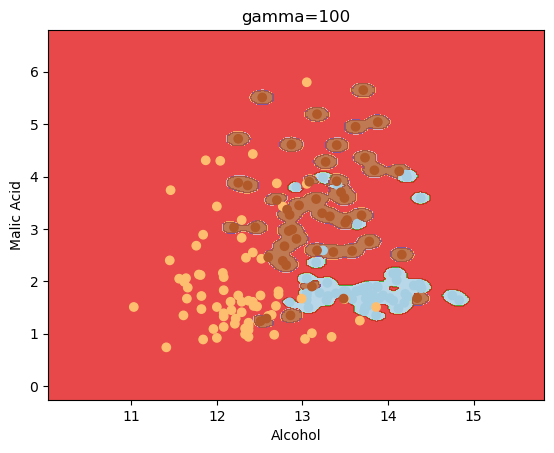

In [87]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma=' + str(gamma))

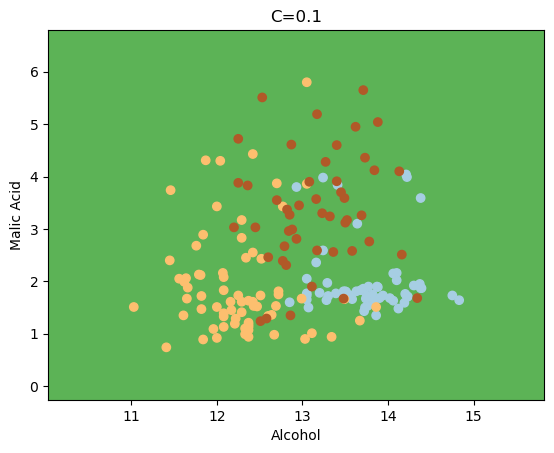

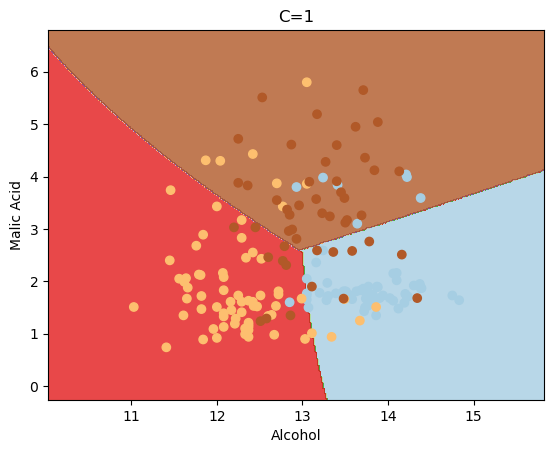

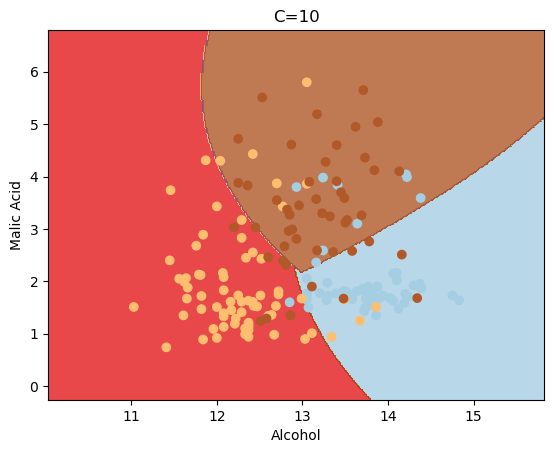

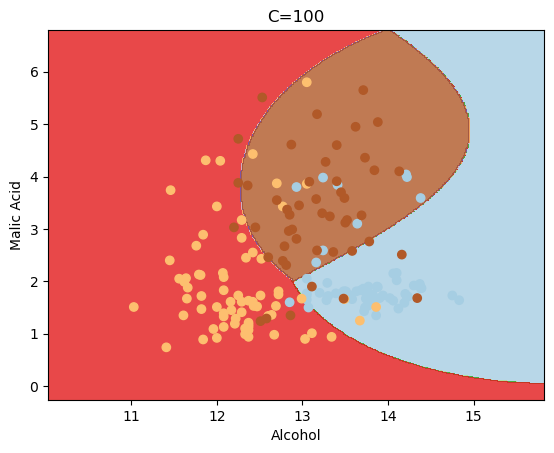

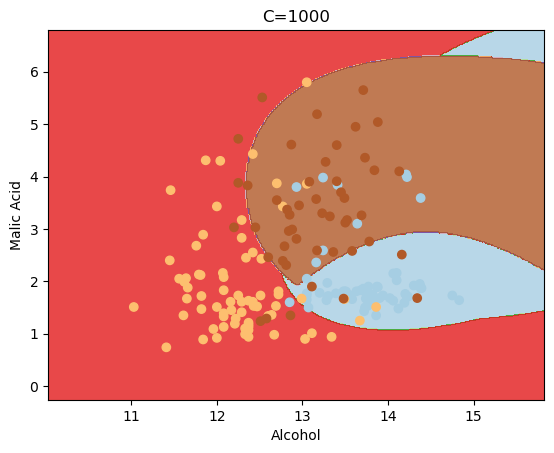

In [88]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
   svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
   plotSVC('C=' + str(c))

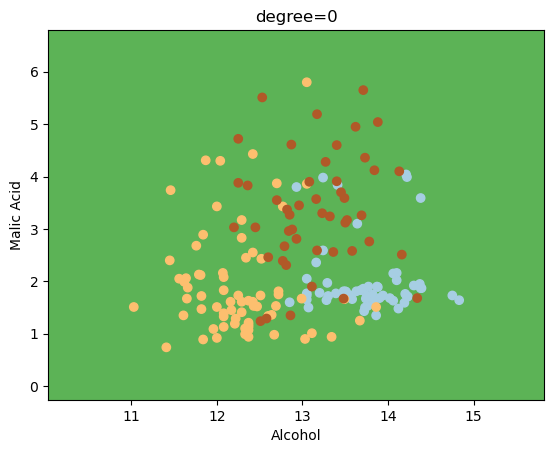

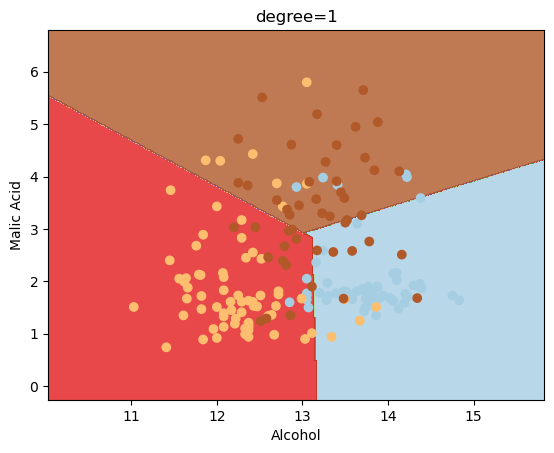

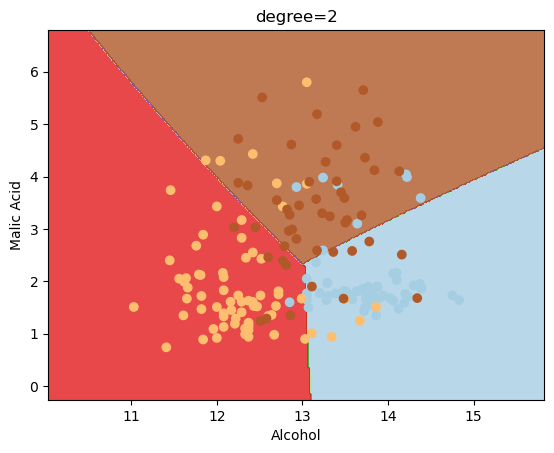

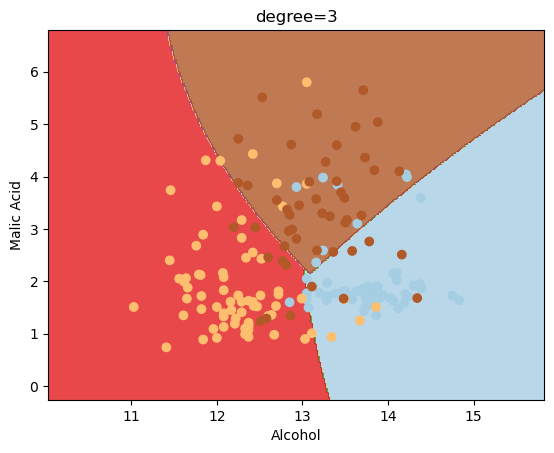

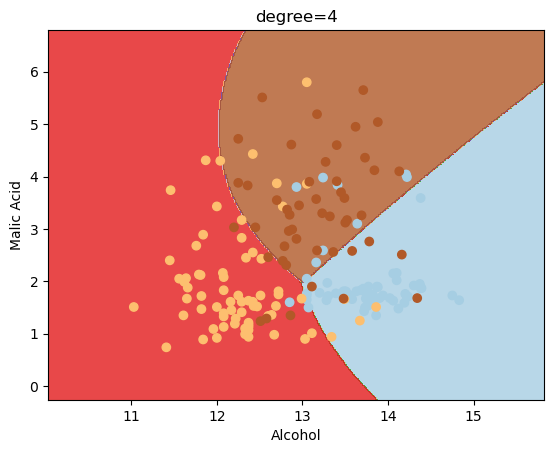

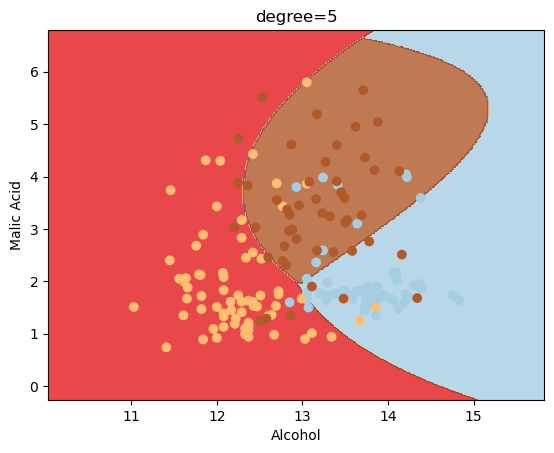

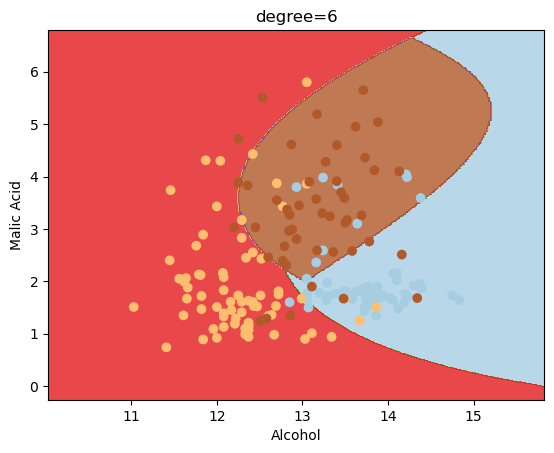

In [89]:
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
   svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
   plotSVC('degree=' + str(degree))

# Ensembling Methods Demo

Stacking Demo

In [148]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [133]:
estimators = [
    ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42))),
    ('mlp',make_pipeline(StandardScaler(), MLPClassifier(alpha=1, max_iter=100)))
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(random_state=42)
 )


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, stratify=y, random_state=42
 )
clf.fit(X_train, y_train).score(X_test, y_test)

0.9777777777777777

In [135]:
svr_clf =make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42))
svr_clf.fit(X_train, y_train).score(X_test, y_test)

0.9777777777777777

In [136]:
mlp_clf =make_pipeline(StandardScaler(), MLPClassifier(alpha=1, max_iter=100))
mlp_clf.fit(X_train, y_train).score(X_test, y_test)

0.9777777777777777

Bagging Demo

In [137]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [139]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=50,max_features=5, random_state=42)

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, stratify=y, random_state=42
 )


In [141]:
bagging_clf.fit(X_train, y_train).score(X_test, y_test)

1.0

In [142]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train).score(X_test, y_test)

0.9555555555555556

Boosting demo

In [143]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

In [144]:
from sklearn.ensemble import AdaBoostClassifier
boost_clf = AdaBoostClassifier(n_estimators=40, random_state=0)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, stratify=y, random_state=42
 )

In [146]:
boost_clf.fit(X_train, y_train).score(X_test, y_test)

0.8

In [147]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train).score(X_test, y_test)

0.9777777777777777